# GeoPandas plotting demo with meteorite dataset. 

1. This demo shows how to plot the lat/lon data of the meteorite dataset to a world map using geopandas. 

In [6]:
!pip install descartes geopandas shapely


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Import the shape file
1. First we import a shape file we downloaded online for the whole earth.

In [8]:
world_map = gpd.read_file('../../data/geo_export_a285d42f-840b-490d-b7af-14c7e337d22c.shp')

## Plot the map using matplotlib

1. Now we cna use the dataframe to plot the data. 
2. We make the figure 1920 x 1080 for a nice resolution. 

In [9]:
fig, ax = plt.subplots(figsize=(192,108))
world_map.plot(ax=ax)

<Axes: >

## Load our dataset
1. We load our full dataset as a dataframe

In [10]:
# import ./data/meteorite_landings.csv
# header is row 0
df_meteorite_data = pd.read_csv('../../data/meteorite_landings.csv', header=0)
df_meteorite_data.head()

name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)

## Extract our lat/lon data
1. Now we pull the lat/lon data from the dataframe and store it as a list of `Point` objects

In [11]:
meteorite_coords = [Point(xy) 
            for xy in zip(df_meteorite_data['reclong'],
                          df_meteorite_data['reclat'])]

## Store our lat/lon data
1. Now we place it in a geopandas dataframe 
2. We also select the type of Coordinate Reference System (CRS)

In [12]:
crs = {'init':'epsg:4326'}
geo_df_meteorites = gpd.GeoDataFrame(df_meteorite_data, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=meteorite_coords) #specify the geometry list we created
geo_df_meteorites.head()

c:\Users\jivey\devel\Metorite_Data_Mine\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation                     geometry  
0    6.08333     (50.775, 6.08333)     POINT (6.08333 50.77500)  
1   10.23333  (56.18333, 10.23333)    POINT (10.23333 56.18333)  
2 -113.00000    (54.21667, -113.0)  POINT (-113.00000 54.21667)  
3  -99.90000     (16.88333, -99.9)   POINT (-99.90000 16.88333)  
4  -64.95000   (-33.16667, -64.95)  POINT (-64.95000 -33.16667)

## Remove Outliers
1. There is an outlier that has a longitude greater than 180
2. There are many entries that have lat/lon = 0

In [13]:
geo_df_meteorites = geo_df_meteorites.drop([22946])

index_of_zero_coords = geo_df_meteorites[
        (geo_df_meteorites['reclong'] == 0) & (geo_df_meteorites['reclat'] == 0)
        ].index

geo_df_meteorites = geo_df_meteorites.drop(index_of_zero_coords)

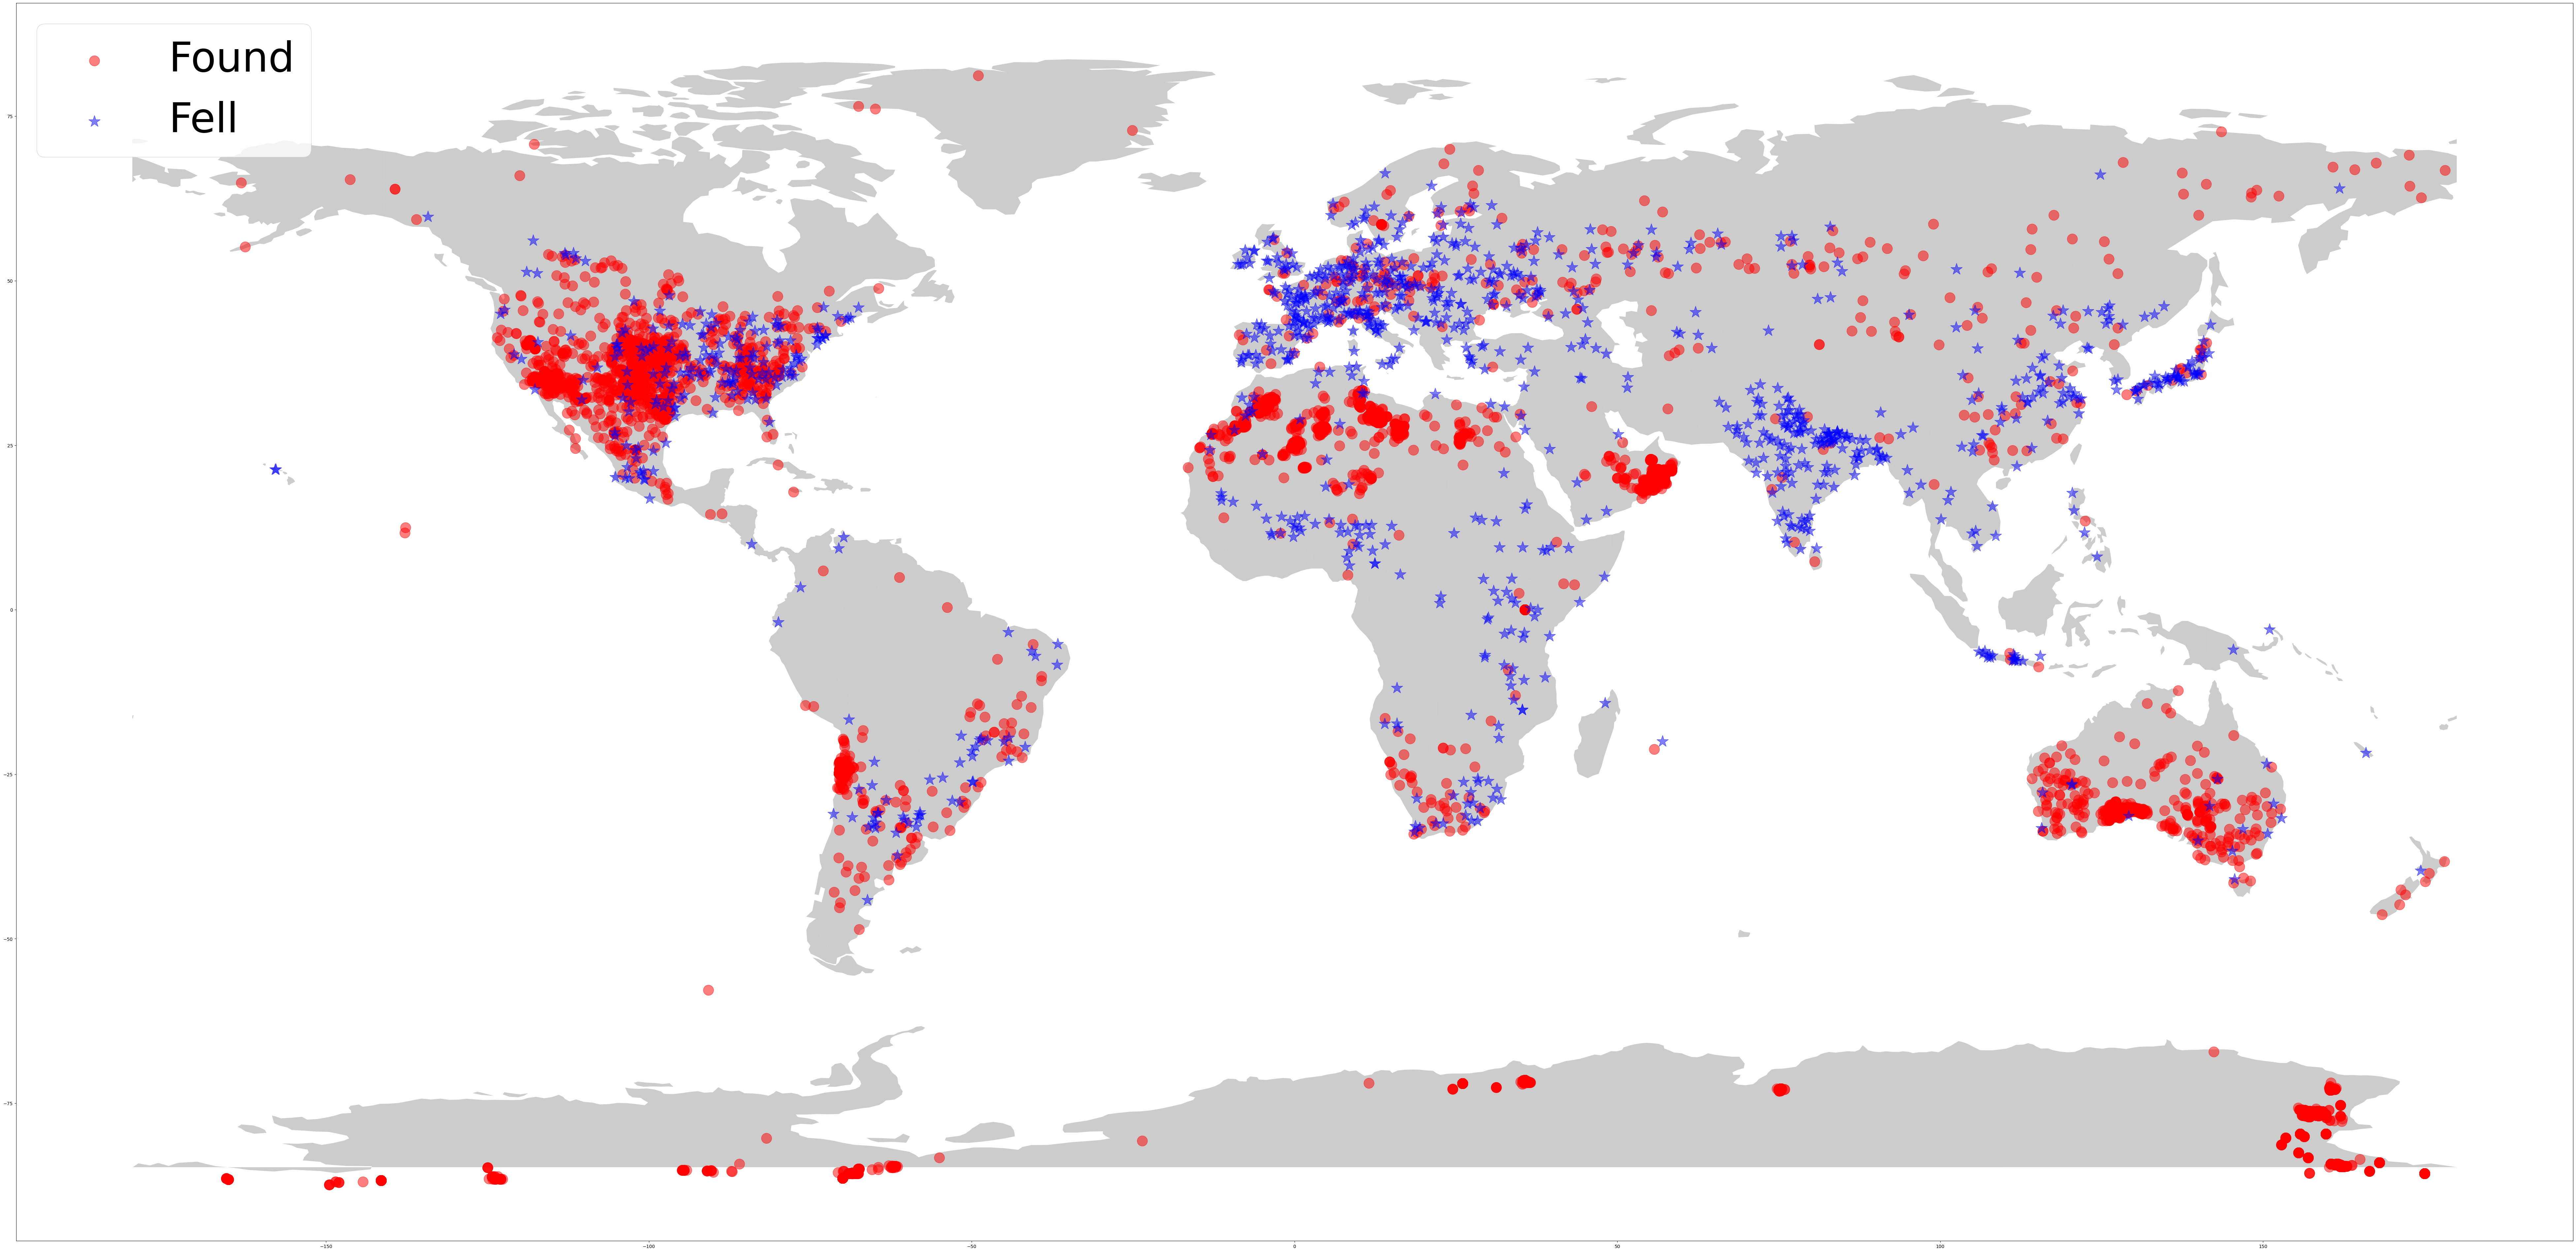

In [14]:
fig, ax = plt.subplots(figsize=(100,100))
world_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df_meteorites[geo_df_meteorites['fall'] == 'Found'].plot(
        ax=ax, 
        markersize=500, 
        color='red', 
        alpha=0.5,
        marker='o', 
        label='Found')
geo_df_meteorites[geo_df_meteorites['fall'] == 'Fell'].plot(
        ax=ax, 
        markersize=700, 
        color='blue', 
        alpha=0.5,
        marker='*', 
        label='Fell')


plt.legend(prop={'size':90})

In [15]:
geo_df_meteorites[(geo_df_meteorites['reclong'] == 0) & (geo_df_meteorites['reclat'] == 0)]

Empty GeoDataFrame
Columns: [name, id, nametype, recclass, mass (g), fall, year, reclat, reclong, GeoLocation, geometry]
Index: []